In [3]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.5 MB/s eta 0:00:00


In [20]:
import praw
import pandas as pd

# Reddit API credentials
client_id = "LVpMIV-_0Aw5-RuDzto0ow"
client_secret = "vOgnOvdy6hscbNOxvOwjYfRTsqOp7w"
user_agent = "ClimateChangeSentimentApp"

# Setting up Reddit API access
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

# Define search parameters
subreddit_name = "climatechange"
keywords = "climate change"
post_limit = 500

# Collect posts related to climate change
posts = []
for sub in reddit.subreddit(subreddit_name).search(keywords, limit=post_limit):
    posts.append([sub.title, sub.selftext])

# Convert posts to DataFrame
df = pd.DataFrame(posts, columns=['Title', 'Body'])
df['Text'] = df['Title'] + ' ' + df['Body']
df = df[['Text']]
df.head()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,Text
0,Is climate change going well or bad I know not...
1,Is Climate Change really real or is Earth heat...
2,"Floridians are getting the hint , climate chan..."
3,Why do some people deny climate change so pass...
4,You will not escape the climate crisis — On Bl...


#**DATA PREPROCESSING**

In [21]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean and preprocess text data
def clean_text(text):
    # Remove urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning function to each post
df['Cleaned_Text'] = df['Text'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Cleaned_Text
0,Is climate change going well or bad I know not...,climate change going well bad know nothing cli...
1,Is Climate Change really real or is Earth heat...,climate change really real earth heating natur...
2,"Floridians are getting the hint , climate chan...",floridians getting hint climate change coming ...
3,Why do some people deny climate change so pass...,people deny climate change passionately notice...
4,You will not escape the climate crisis — On Bl...,escape climate crisis bluesky pointed ashevill...


# **Text Vectorization**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(max_features=5000)
X = tfidf_vect.fit_transform(df['Cleaned_Text'])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vect.get_feature_names_out())
tfidf_df.head()

,abandon,ability,able,absolute,absolutely,absorb,absorbed,absorption,abstract,absurd,...,york,young,youth,youtube,youtuber,yrs,zealand,zero,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.240428,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [24]:
import numpy as np
df['Sentiment'] = np.random.choice(['positive', 'negative', 'neutral'], len(df))

# Encode sentiment labels numerically
df['Sentiment_Label'] = df['Sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})
y = df['Sentiment_Label']


# **Modelling**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=200)

# Train models
nb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predict with both models
nb_pred = nb_model.predict(X_test)
lr_pred= lr_model.predict(X_test)


In [31]:
# Evaluation function to display results
def evaluate_model(name, preds, y_test):
    print(f"Model: {name}")
    print("Classification Report:")
    print(classification_report(y_test, preds, target_names=['Negative', 'Positive', 'Neutral']))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    print("\n")

# Evaluate Naive Bayes
evaluate_model("Naive Bayes", nb_pred, y_test)

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", lr_pred, y_test)


Model: Naive Bayes
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.08      0.14        13
    Positive       0.42      0.58      0.49        19
     Neutral       0.32      0.43      0.36        14

    accuracy                           0.39        46
   macro avg       0.58      0.36      0.33        46
weighted avg       0.55      0.39      0.35        46

Confusion Matrix:
[[ 1  7  5]
 [ 0 11  8]
 [ 0  8  6]]


Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.08      0.13        13
    Positive       0.42      0.53      0.47        19
     Neutral       0.30      0.43      0.35        14

    accuracy                           0.37        46
   macro avg       0.41      0.34      0.32        46
weighted avg       0.40      0.37      0.34        46

Confusion Matrix:
[[ 1  7  5]
 [ 0 10  9]
 [ 1  7  6]]




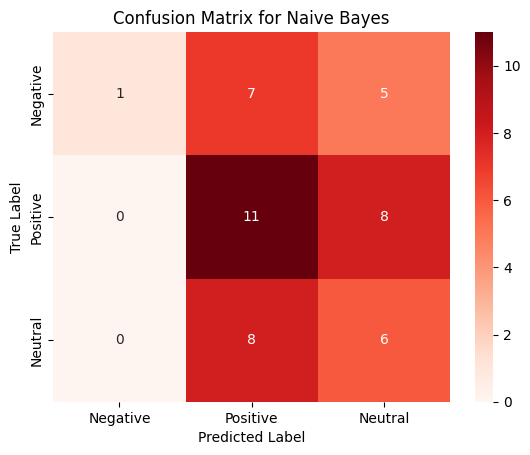

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, nb_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


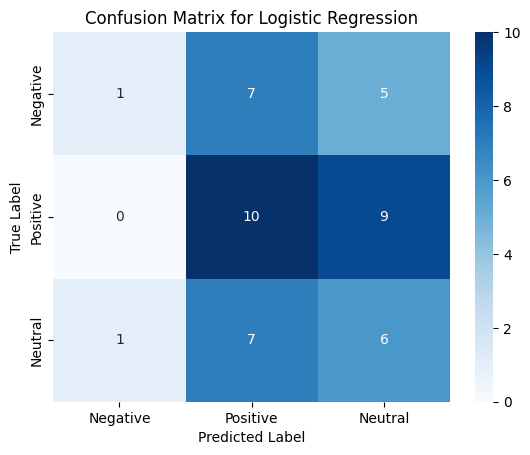

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, lr_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
